# Title: Titanic Dataset - Exploratory Data Analysis (EDA)

# Author: Touseef Asif

# Objective: Perform EDA and Visualization to derive key insights.

# Step 1: Import Libraries

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting seaborn style for better visuals
sns.set(style="whitegrid")

# Step 2: Load the Dataset

In [3]:
# Load the Titanic dataset
df = pd.read_csv('train.csv')

# Display the first 5 rows of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Step 3: Explore the Dataset

In [4]:
# Overview of the dataset
print("Dataset Info:")
df.info()

# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Summary Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   

# Step 4: Data Cleaning
## 4.1 Handle Missing Values

In [5]:
# Fill missing Age values with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing Embarked values with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop the Cabin column
df.drop(columns=['Cabin'], inplace=True)

# Verify missing values are handled
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())


Missing Values After Cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


C:\Users\Touseef Asif\AppData\Local\Temp\ipykernel_1008\3171597806.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Touseef Asif\AppData\Local\Temp\ipykernel_1008\3171597806.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

## 4.2 Remove Duplicates

In [6]:
# Check for duplicates
print("\nNumber of Duplicates:", df.duplicated().sum())

# Remove duplicates if any
df.drop_duplicates(inplace=True)


Number of Duplicates: 0


# Step 5: Visualizations

## 5.1 Bar Chart for a Categorical Variable

### Plot the count of passengers by their survival status (Survived).

C:\Users\Touseef Asif\AppData\Local\Temp\ipykernel_1008\4215395710.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Survived', palette='viridis')


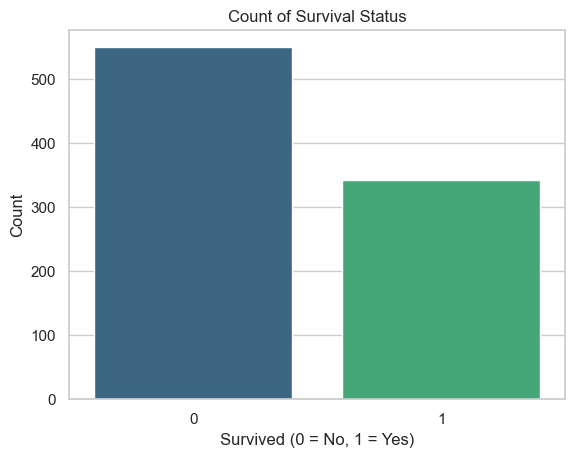

In [10]:
# Bar chart for survival counts
sns.countplot(data=df, x='Survived', palette='viridis')
plt.title('Count of Survival Status')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
# Save the chart as an image file
plt.savefig('survival_counts.png', dpi=300, bbox_inches='tight')
# Show the Chart
plt.show()

## 5.2 Histogram for a Numerical Variable

### Plot a histogram for the Age column.

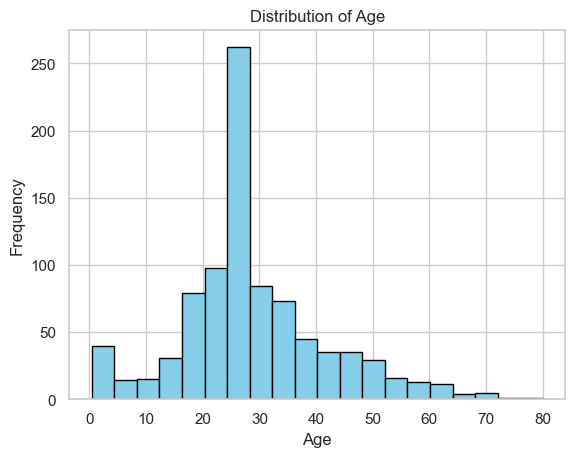

In [9]:
# Histogram for Age
df['Age'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
# Save the chart as an image file
plt.savefig('age_distribution.png', dpi=300, bbox_inches='tight')

# Show the chart
plt.show()

## 5.3 Encode Categorical Variables

In [11]:
# Encode 'Sex' column (0 for male, 1 for female)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Encode 'Embarked' column (assign numerical values)
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

## 5.4 Correlation Heatmap

### Generate a heatmap to show correlations between numerical features.

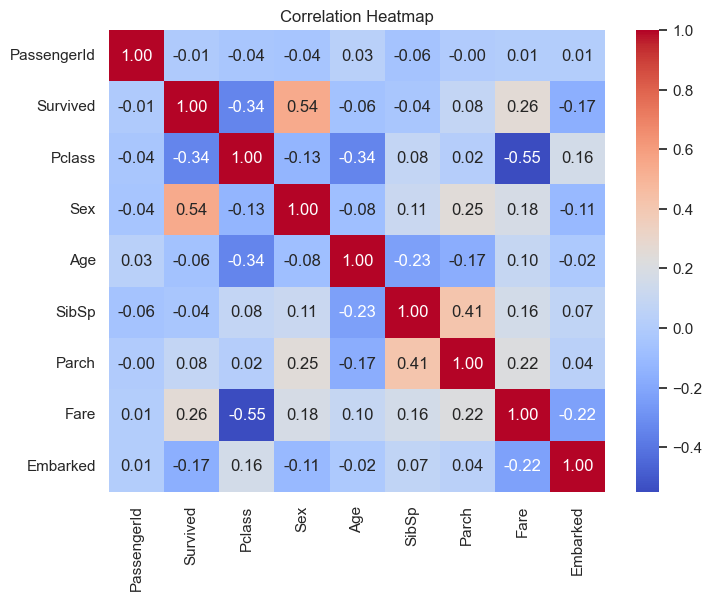

In [12]:
# Filter only numerical columns for correlation
numeric_columns = df.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [13]:
print("Columns used for correlation:")
print(numeric_columns.columns)

Columns used for correlation:
Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')


## Key Observation

**Insights:**
1. Female passengers had a significantly higher survival rate than male passengers.
2. Passengers in 1st Class had the highest survival rate, while those in 3rd Class had the lowest.
3. Children under 10 years old had a higher survival rate compared to other age groups.
4. Fare showed a positive correlation with survival, indicating that passengers paying higher fares had better survival chances.

# Conclusion

This exploratory data analysis reveals important patterns in the Titanic dataset. The findings align with historical accounts of the Titanic disaster, such as prioritization of women and children for survival and the impact of socioeconomic status on survival rates.

This notebook provides a framework for further analysis and can be extended with additional machine learning models.